<a href="https://colab.research.google.com/github/godly-raam/Quantum_TSP_Project/blob/main/Quantum_TSP_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Final Installation: Pinning all packages to known compatible versions.
!pip install qiskit==1.1.0 qiskit-aer==0.14.2 qiskit-algorithms==0.3.0 qiskit-optimization==0.7.0 networkx matplotlib

In [2]:
import qiskit
import qiskit_aer
import qiskit_algorithms
import qiskit_optimization

print(f"Qiskit version: {qiskit.__version__}")
print(f"Qiskit Aer version: {qiskit_aer.__version__}")
print(f"Qiskit Algorithms version: {qiskit_algorithms.__version__}")
print(f"Qiskit Optimization version: {qiskit_optimization.__version__}")

Qiskit version: 1.1.0
Qiskit Aer version: 0.14.2
Qiskit Algorithms version: 0.3.0
Qiskit Optimization version: 0.7.0


In [3]:
# Cell 2: Connect to Google Drive and set up the project path
from google.colab import drive
import sys

drive.mount('/content/drive')

# Define the path to your project folder
project_path = '/content/drive/My Drive/Quantum_TSP_Project/'
# Add the 'modules' folder to Python's path
sys.path.append(project_path + 'modules/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Cell 3: Import everything you need
import numpy as np
import classical_solver
import quantum_solver
import plotter

In [5]:
# Cell 4: Define the specific instance of your TSP
n = 4  # Number of cities
seed = 123  # For reproducibility

# Generate city coordinates and the distance matrix
np.random.seed(seed)
coords = np.random.randint(0, 100, size=(n, 2))
distance_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(i + 1, n):
        dist = np.linalg.norm(coords[i] - coords[j])
        distance_matrix[i, j] = distance_matrix[j, i] = dist

print("--- Problem Definition ---")
print(f"{n} cities with random coordinates.")

--- Problem Definition ---
4 cities with random coordinates.


In [6]:
# Cell 5: Execute the classical and quantum solvers
classical_route, classical_distance = classical_solver.solve_classical_tsp(distance_matrix)
quantum_route, quantum_distance = quantum_solver.solve_quantum_tsp(distance_matrix, seed=seed)

--- Classical Solution ---
Route: [0, 2, 1, 3, 0]
Distance: 183.14

--- Quantum Solution ---
Route: [0, 3, 1, 2]
Distance: 183.14


/content/drive/My Drive/Quantum_TSP_Project/modules/plotter.py:26: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edgelist=quantum_edges, edge_color='red', width=2.0, style='dashed', connectionstyle='arc3,rad=0.1', label="Quantum")


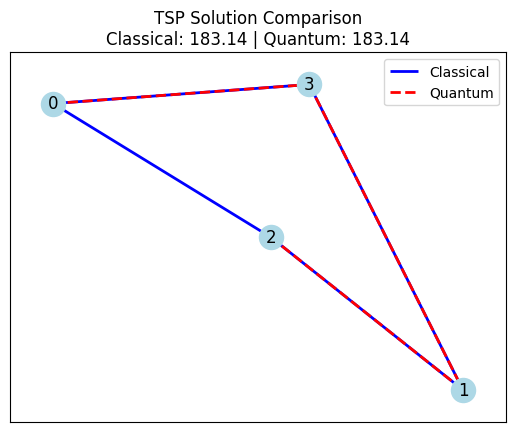


Plot saved to: /content/drive/My Drive/Quantum_TSP_Project/results/route_comparison.png


<Figure size 640x480 with 0 Axes>

In [7]:
# Cell 6: Plot the results and save the figure
final_plot = plotter.plot_results(coords, classical_route, classical_distance, quantum_route, quantum_distance)

# Optionally, save the figure to your results folder
figure_path = project_path + 'results/route_comparison.png'
final_plot.savefig(figure_path)
print(f"\nPlot saved to: {figure_path}")